# Cross-match LAMOST DR4 red clumps with LAMOST DR3 from Sanders and Das to compare distances

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

In [2]:
# Read LAMOST DR4 with Gaia cross-match data
lamostdr4_gaia_inputsfile = "../data/lamost/LMRC-DR4-VF-SNR30-Gaia.csv"
lamostdr4_gaia_inputs = pd.read_csv(lamostdr4_gaia_inputsfile)
nstars = len(lamostdr4_gaia_inputs)
print nstars
print list(lamostdr4_gaia_inputs)

129989
['Unnamed: 0', 'ID', 'ra', 'era', 'dec', 'edec', 's', 'es', 'vr', 'evr', 'mra', 'emra', 'mdec', 'emdec', 'feh', 'efeh', 'afe', 'eafe', 'age', 'eage', 'fcmd', 'fieldid', 'color', 'mag', 'gl_cen', 'gb_cen', 'gaiadr2_ra', 'gaiadr2_ra_error', 'gaiadr2_dec', 'gaiadr2_dec_error', 'gaiadr2_parallax', 'gaiadr2_parallax_error', 'gaiadr2_pmra', 'gaiadr2_pmra_error', 'gaiadr2_pmdec', 'gaiadr2_pmdec_error', 'gaiadr2_ra_dec_corr', 'gaiadr2_ra_parallax_corr', 'gaiadr2_ra_pmra_corr', 'gaiadr2_ra_pmdec_corr', 'gaiadr2_dec_parallax_corr', 'gaiadr2_dec_pmra_corr', 'gaiadr2_dec_pmdec_corr', 'gaiadr2_parallax_pmra_corr', 'gaiadr2_parallax_pmdec_corr', 'gaiadr2_pmra_pmdec_corr', 'gaiamatch']


In [4]:
# Read LAMOST DR3 input data used in Sanders & Das catalogue
lamostdr3_inputsfile = "../data/lamost/LAMOST_input_MASTER.hdf5"
lamostdr3_inputs     = pd.read_hdf(lamostdr3_inputsfile)
print len(lamostdr3_inputs)
print list(lamostdr3_inputs)

3177995
['obsid', 'designation', 'obsdate', 'lmjd', 'mjd', 'planid', 'spid', 'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg', 'snrr', 'snri', 'snrz', 'objtype', 'class', 'subclass', 'z', 'z_err', 'magtype', 'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'tsource', 'fibertype', 'tfrom', 'tcomment', 'offsets', 'offset_v', 'ra', 'dec', 'teff', 'e_teff', 'logg', 'e_logg', 'fe_h', 'e_fe_h', 'hrv', 'e_hrv', 'J', 'eJ', 'H', 'eH', 'K', 'eK', 'g', 'eg', 'r', 'er', 'i', 'mag_use', 'rho_Tg', 'rho_TZ', 'rho_gZ', 'mass', 'mass_error', 'source_id', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'G', 'GBP', 'GRP', 'a_g_val', 'a_g_percentile_lower', 'a_g_percentile_upper', 'eG', 'eGRP', 'eGBP', 'dist']


In [8]:
# Read LAMOST DR3 distances from Sanders & Das catalogue
lamostdr3_outputsfile = "../data/lamost/LAMOST_distances_withPRIOR_MASTER.hdf5"
lamostdr3_outputs     = pd.read_hdf(lamostdr3_outputsfile)
print list(lamostdr3_outputs)

['obsid', 'source_id', 'dm', 'dm_err', 'dist', 'dist_err', 'par', 'par_err', 'log10_age', 'log10_age_err', 'mass', 'mass_err', 'Z', 'Z_err', 'log10_av', 'log10_av_err', 'log10_teff', 'log10_teff_err', 'logg', 'logg_err', 'dm_log10age_corr', 'log10age_Z_corr', 'dm_Z_corr', 'l', 'b', 's', 'vlos', 'mu_l', 'mu_b', 'R', 'phi', 'z', 'vR', 'vphi', 'vz', 'JR', 'Lz', 'Jz', 'Rc', 's_err', 'vlos_err', 'mu_l_err', 'mu_b_err', 'R_err', 'phi_err', 'z_err', 'vR_err', 'vphi_err', 'vz_err', 'JR_err', 'Lz_err', 'Jz_err', 'Rc_err', 'flag']


In [9]:
# Supplement LAMOST DR4 catalogue with SD distances where available
lamostdr4        = SkyCoord(ra=(lamostdr4_gaia_inputs["ra"].values)*u.degree, 
                            dec=(lamostdr4_gaia_inputs["dec"].values)*u.degree)
lamostdr3        = SkyCoord(ra=lamostdr3_inputs["ra"].values*u.degree,
                            dec=lamostdr3_inputs["dec"].values*u.degree)
idx, d2d, d3d    = lamostdr4.match_to_catalog_sky(lamostdr3)
arcsecsep        = d2d.arcsecond
minarcsecsep     = 10.

In [10]:
print len(arcsecsep)
print nstars

129989
129989


In [11]:
# Find matching data and record SD distances and ages
dm_sd           = np.zeros(nstars)-9999.
dm_err_sd       = np.zeros(nstars)-9999.
s_sd            = np.zeros(nstars)-9999.
s_err_sd        = np.zeros(nstars)-9999.
log10age_sd     = np.zeros(nstars)-9999.
log10age_err_sd = np.zeros(nstars)-9999.
for jstars in range(nstars):
    if (arcsecsep[jstars] <= minarcsecsep):
        dm_sd[jstars]           = lamostdr3_outputs["dm"][idx[jstars]]
        dm_err_sd[jstars]       = lamostdr3_outputs["dm_err"][idx[jstars]]
        s_sd[jstars]            = lamostdr3_outputs["s"][idx[jstars]]
        s_err_sd[jstars]        = lamostdr3_outputs["s_err"][idx[jstars]]
        log10age_sd[jstars]     = lamostdr3_outputs["log10_age"][idx[jstars]]
        log10age_err_sd[jstars] = lamostdr3_outputs["log10_age_err"][idx[jstars]]
nmatch = np.sum(dm_sd>-9999)
print("Number of matches: "+str(nmatch))
print nstars

Number of matches: 91880
129989


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


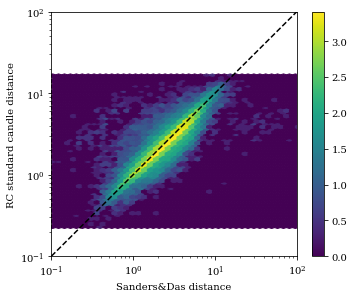

In [20]:
# Compare red clump and SD distances
distmin = 0.1
distmax = 100.
index = s_sd > -9999
plt.rc('font',family='serif')  
fig = plt.figure(figsize=(5.5,4.5)) 
plt.hexbin(s_sd[index],lamostdr4_gaia_inputs["s"][index],xscale="log",yscale="log",
           gridsize=50,bins="log")
plt.colorbar()
plt.plot([distmin,distmax],[distmin,distmax],'--k')
plt.xlim([distmin,distmax])
plt.ylim([distmin,distmax])
plt.xlabel("Sanders&Das distance")
plt.ylabel("RC standard candle distance")
plotfile = "../plots/distcomp_rc_vs_sd.eps"
fig.savefig(plotfile,format='eps')

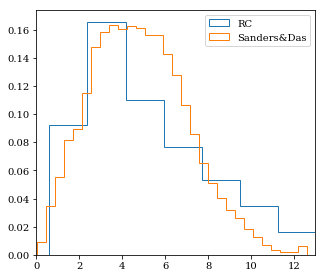

In [21]:
plt.rc('font',family='serif')  
fig = plt.figure(figsize=(5,4.5)) 
plt.hist(lamostdr4_gaia_inputs["age"][index],100,normed=True,histtype="step",label="RC")
plt.hist(10.**log10age_sd[index],30,normed=True,histtype="step",label="Sanders&Das")
plt.xlim([0,13.])
plt.legend()
plotfile = "../plots/agecomp_hist_rc_vs_sd.eps"
fig.savefig(plotfile,format='eps')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


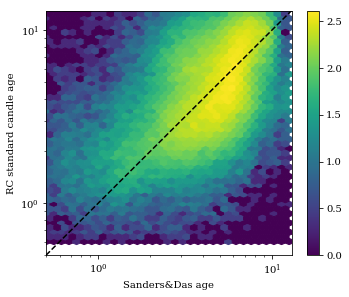

In [30]:
# Compare red clump and SD ages
agemin = 0.5
agemax = 13.
index  = log10age_sd > -9999
plt.rc('font',family='serif')  
fig = plt.figure(figsize=(5.5,4.5)) 
plt.hexbin(10.**log10age_sd[index],lamostdr4_gaia_inputs["age"][index],xscale="log",
           yscale="log",gridsize=80,bins="log")
plt.colorbar()
plt.plot([agemin,agemax],[agemin,agemax],'--k')
plt.xlim([agemin,agemax])
plt.ylim([agemin,agemax])
plt.xlabel("Sanders&Das age")
plt.ylabel("RC standard candle age")
plotfile = "../plots/agecomp_rc_vs_sd.eps"
fig.savefig(plotfile,format='eps')

In [31]:
# Write new file, using SD distances and ages where available
lamostdr4_gaia_inputs_new         = lamostdr4_gaia_inputs.copy()
snew                              = np.copy(lamostdr4_gaia_inputs["s"])
esnew                             = np.copy(lamostdr4_gaia_inputs["es"])
agenew                            = np.copy(lamostdr4_gaia_inputs["age"])
eagenew                           = np.copy(lamostdr4_gaia_inputs["eage"])
snew[index]                       = s_sd[index]  
esnew[index]                      = s_err_sd[index]
agenew[index]                     = 10.**log10age_sd[index]
eagenew[index]                    = np.log(10.) * 10.**log10age_sd[index] * log10age_err_sd[index]
lamostdr4_gaia_inputs_new["s"]    = snew
lamostdr4_gaia_inputs_new["es"]   = esnew
lamostdr4_gaia_inputs_new["age"]  = agenew
lamostdr4_gaia_inputs_new["eage"] = eagenew
lamostdr4_gaia_outputsfile        = "../data/lamost/LMRC-DR4-VF-SNR30-Gaia_sdagesdist.csv"
lamostdr4_gaia_inputs_new.to_csv(lamostdr4_gaia_outputsfile)